In [1]:
#DATA VISUALIZATION PORTFOLIO
#TOPIC: RESTAURANT TIPS
#LIBRARIES USED PANDAS, MATPLOTLIB AND SEABORN

In [59]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
#Importing data from google sheets
sheet_id  = '1hiuVpDohFWYwNdWbwsk7pL6iGlfeATsFL1eQuNwXijw'
data_table = pd.read_csv(f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv')

In [4]:
data_table.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
#Checking for number of rows and columns
data_table.shape

(244, 7)

In [8]:
#Checking for null values
data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 9.6+ KB


In [19]:
#Checking for unique values of categorical data
print(data_table.sex.unique())
print(data_table.day.unique())
print(data_table.time.unique())

['Female' 'Male']
['Sun' 'Sat' 'Thur' 'Fri']
['Dinner' 'Lunch']


<AxesSubplot:ylabel='time'>

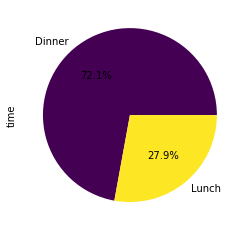

In [179]:
# Visual representation of general figures in percetanges
data_table.time.value_counts().plot(kind='pie', autopct='%1.1f%%',cmap='viridis')

<AxesSubplot:>

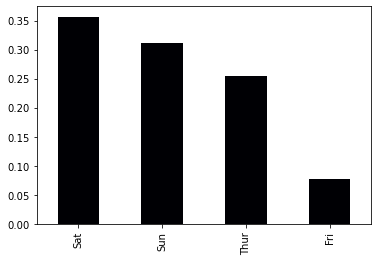

In [178]:
data_table['day'].value_counts(normalize=True).plot(kind='bar',cmap='magma')

<AxesSubplot:ylabel='sex'>

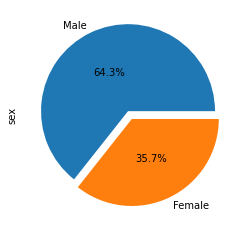

In [49]:
data_table['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', pctdistance=0.50, explode=((0.05, 0.05)))

In [51]:
#Moving to the analysis of tips with respect to different factors

In [53]:
#Tips with respect to time i.e. when do people pay more- lunch or dinner?
data_table.groupby(['time'])['tip'].mean()

time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64

<AxesSubplot:xlabel='time'>

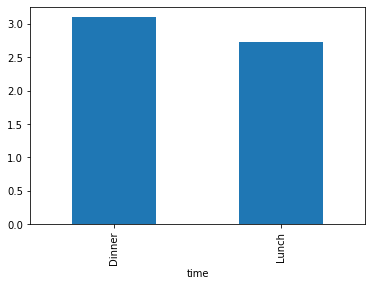

In [57]:
data_table.groupby(['time'])['tip'].mean().plot(kind='bar')

In [58]:
#Tips with respect to day i.e. on which days do people pay more?
data_table.groupby(['day'])['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

<AxesSubplot:xlabel='day'>

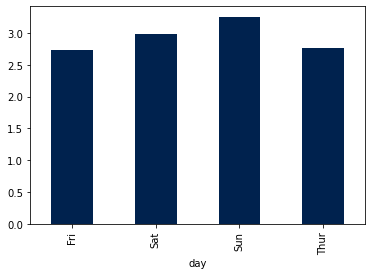

In [180]:
data_table.groupby(['day'])['tip'].mean().plot(kind='bar',cmap='cividis')

In [68]:
#Tips with respect to sex i.e. who pays more- male or female?
data_table.groupby(['sex'])['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

<AxesSubplot:ylabel='tip'>

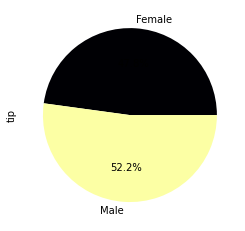

In [175]:
data_table.groupby(['sex'])['tip'].mean().plot(kind='pie', autopct='%1.1f%%', cmap='inferno')

In [72]:
#Tips with respect to smoker i.e. who pays more- smoker or non-smoker?
data_table.groupby(['smoker'])['tip'].mean()

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

<AxesSubplot:ylabel='tip'>

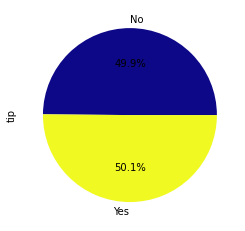

In [174]:
data_table.groupby(['smoker'])['tip'].mean().plot(kind='pie', autopct='%1.1f%%',cmap='plasma')

In [74]:
#Grouping by more than one dimension


In [77]:
#Tips with respect to smoker and sex i.e. who pays more- male/female smoker or male/female non-smoker?
data_table.groupby(['smoker','sex'])['tip'].mean().unstack()

sex,Female,Male
smoker,,
No,2.773519,3.113402
Yes,2.931515,3.051167


<AxesSubplot:xlabel='smoker'>

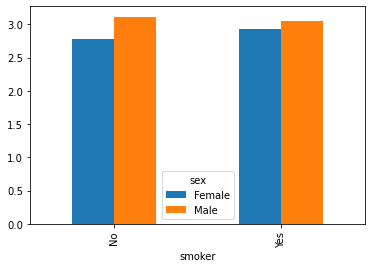

In [78]:
data_table.groupby(['smoker','sex'])['tip'].mean().unstack().plot(kind='bar')

In [97]:
#Tips with respect to time and sex i.e. who pays more and during which slot?
data_table.groupby(['time','sex'])['tip'].mean().unstack()

sex,Female,Male
time,,
Dinner,3.002115,3.144839
Lunch,2.582857,2.882121


<AxesSubplot:xlabel='time'>

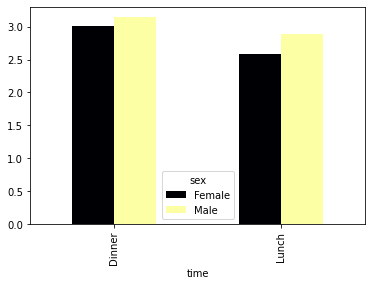

In [172]:
data_table.groupby(['time','sex'])['tip'].mean().unstack().plot(kind='bar',cmap='inferno')

In [99]:
#Tips with respect to day and sex i.e. who pays more and when?
data_table.groupby(['day','sex'])['tip'].mean().unstack()

sex,Female,Male
day,,
Fri,2.781111,2.693000
Sat,2.801786,3.083898
Sun,3.367222,3.220345
Thur,2.575625,2.980333


<AxesSubplot:xlabel='day'>

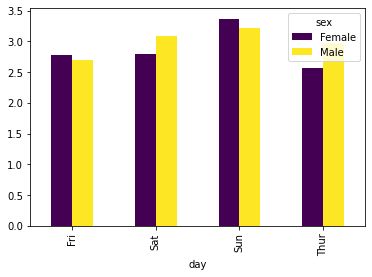

In [170]:
data_table.groupby(['day','sex'])['tip'].mean().unstack().plot(kind='bar',cmap='viridis')

In [101]:
#Studying the tip and total bill with respect to different factors

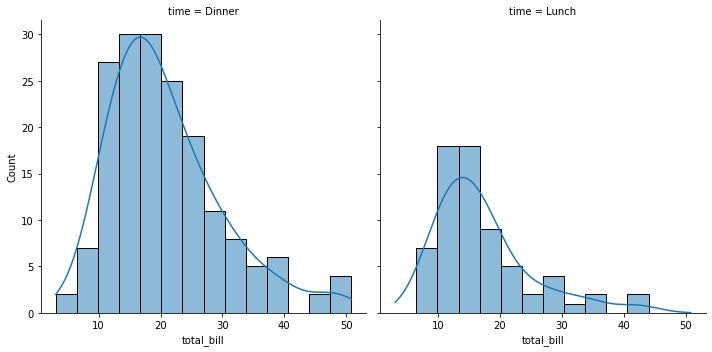

In [152]:
#Total bills generated with respect to time
sns.displot(data=data_table,x='total_bill',col='time',kde=True)

In [104]:
#Introducing a new column
data_table['t_b_ratio'] = data_table['tip']/data_table['total_bill']
data_table.head()

,total_bill,tip,sex,smoker,day,time,size,t_b_ratio
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

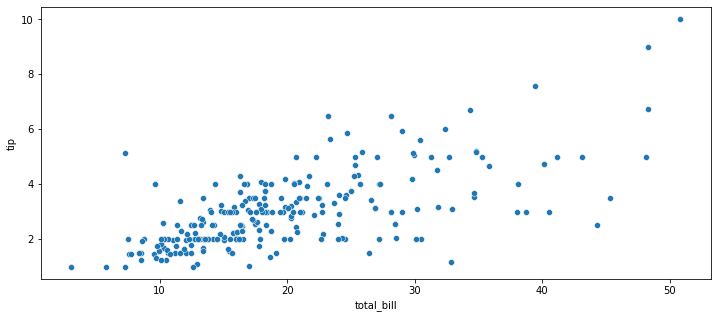

In [125]:
#Relation between total bill and tips
plt.figure(figsize=(12,5))
sns.scatterplot(x='total_bill', y='tip', data=data_table)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

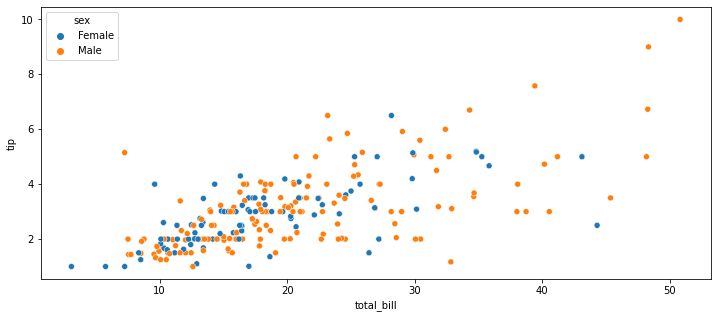

In [143]:
#Relation between total bill and tip with respect to sex
plt.figure(figsize=(12,5))
sns.scatterplot(x='total_bill', y='tip', data=data_table,hue='sex')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

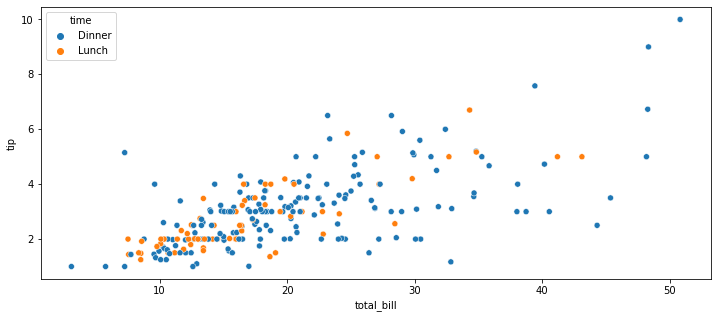

In [144]:
#Relation between total bill and tip with respect to time
plt.figure(figsize=(12,5))
sns.scatterplot(x='total_bill', y='tip', data=data_table,hue='time')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

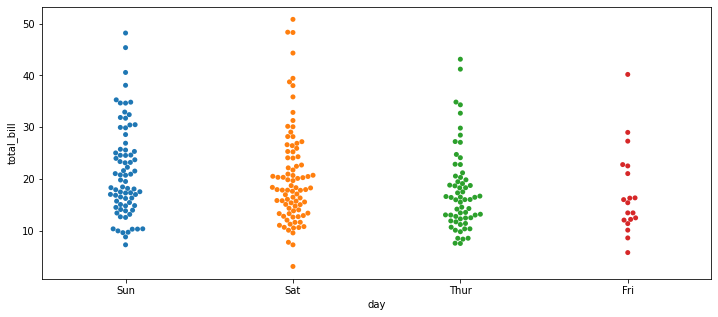

In [124]:
#Relation between total bill and days
plt.figure(figsize=(12,5))
sns.swarmplot(x='day',y='total_bill',data=data_table)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

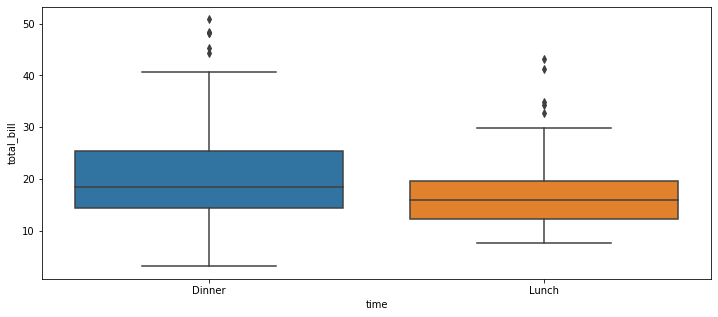

In [127]:
#Relation between total bill and time
plt.figure(figsize=(12,5))
sns.boxplot(x='time',y='total_bill', data=data_table)

<Figure size 864x360 with 0 Axes>

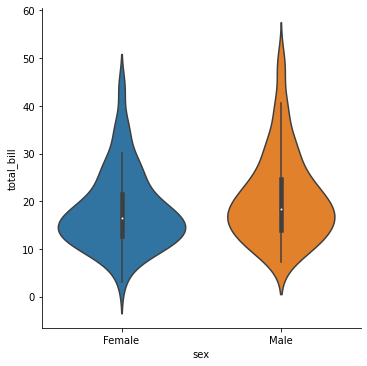

In [156]:
#Relation between total bill and sex
plt.figure(figsize=(12,5))
sns.catplot(x='sex',y='total_bill',data=data_table,kind='violin')

In [136]:
#correaltion between different numerical columns
dc = data_table.corr()

<AxesSubplot:>

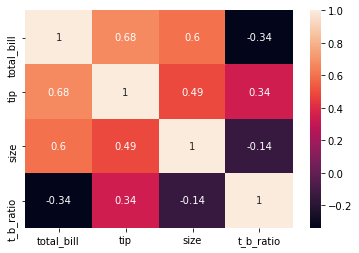

In [135]:
sns.heatmap(dc,annot=True)

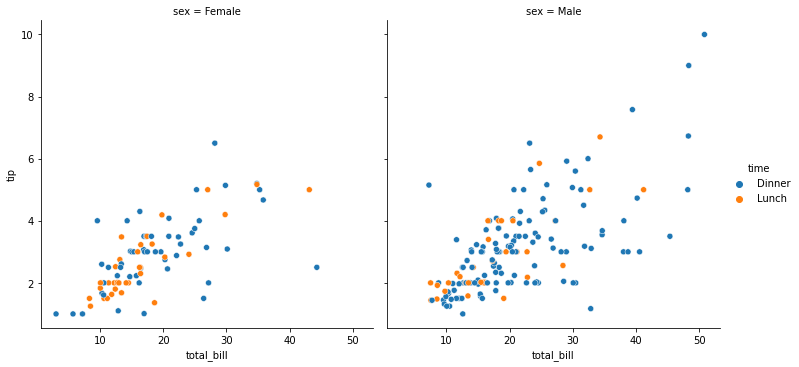

In [146]:
#combining 4 factors together
sns.relplot(x='total_bill',y='tip',data=data_table,col='sex',hue='time')

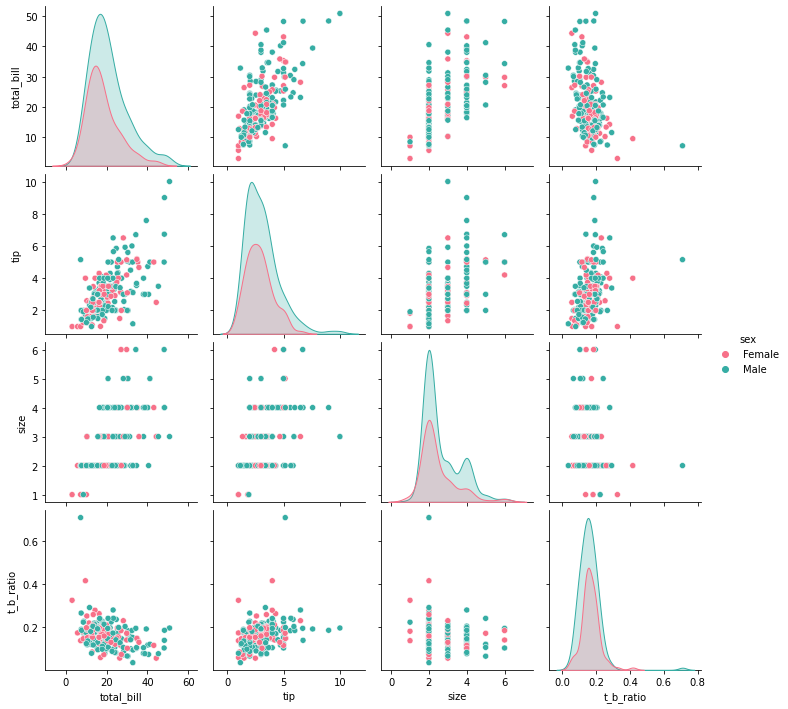

In [163]:
#Comparison between all the possible numeric and categorical columns of the data frame
sns.pairplot(data_table,hue='sex' ,palette='husl')